# Importing necessary libraries

In [2]:
#Importing libraries to be used
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Loading and Inspecting Data

In [3]:
#Loading the life expectancy and GDP data into a pandas dataframe
life_gdp = pd.read_csv("all_data.csv")
life_gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
#Checking the info of the dataframe
life_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
life_gdp.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [6]:
life_gdp.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

# Cleaning and Tidying Data

In [7]:
#Changing United States of America to USA to make it easier to work with
life_gdp["Country"] = life_gdp.Country.replace("United States of America", "USA")

In [8]:
#Changing the life expectancy column name to make it easier to work with
life_gdp.rename(columns = {"Life expectancy at birth (years)": "Life_Expectancy"}, inplace = True)
life_gdp.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Visualizing the distribution of Life Expectancy and GDP for each country

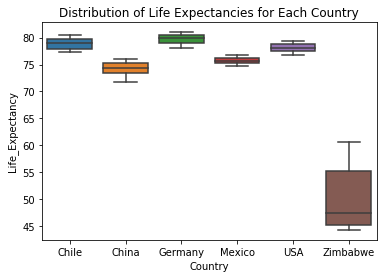

In [9]:
sns.boxplot(data = life_gdp, x = "Country", y = "Life_Expectancy")
plt.title("Distribution of Life Expectancies for Each Country")
plt.savefig("Distribution of Life Expectancies for Each Country box plot.png")
#There is a very high association between country and life expectancy from the boxplot

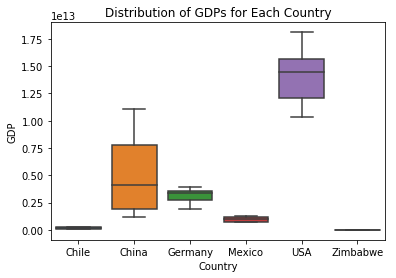

In [10]:
sns.boxplot(data = life_gdp, x = "Country", y = "GDP")
plt.title("Distribution of GDPs for Each Country")
plt.savefig("Distribution of GDPs for Each Country box plot.png")

# Visualizing the trend of Life Expectancy and GDP over the years for each country

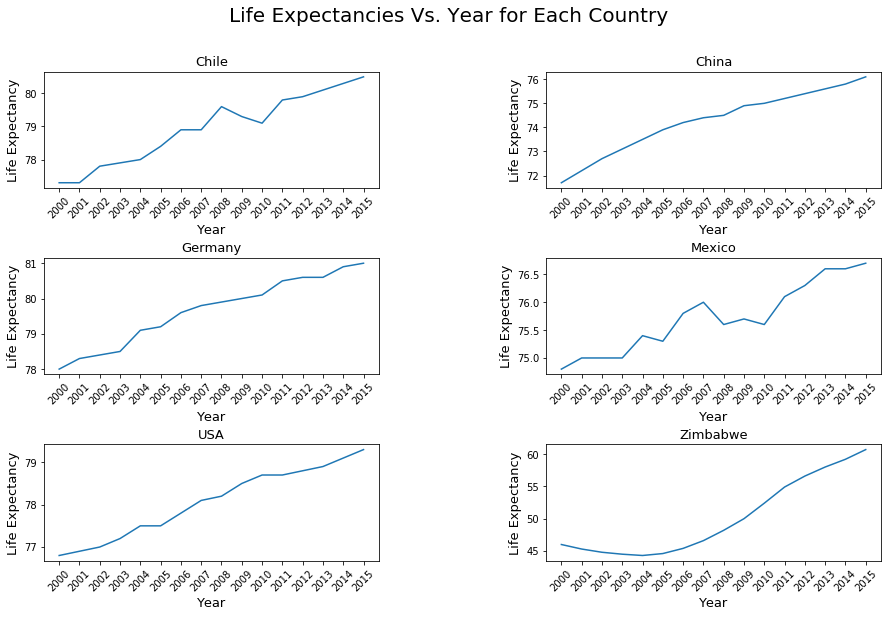

In [26]:
fig = plt.figure(figsize = (15, 9))
fig.suptitle('Life Expectancies Vs. Year for Each Country', fontsize = 20)
plt.subplots_adjust(wspace = 0.5, hspace = 0.6)
index = 1
countries = life_gdp.Country.unique()
for country in countries:
    plt.subplot(3, 2, index)
    data = life_gdp[life_gdp.Country == country]
    sns.lineplot(data = data, x = "Year", y = "Life_Expectancy")
    plt.xticks(life_gdp.Year.unique(), rotation = 45)
    plt.xlabel("Year", fontsize = 13)
    plt.ylabel("Life Expectancy", fontsize = 13)
    plt.title(country, fontsize = 13)
    index += 1
plt.savefig("Life Expectancies Vs. Year line plot.png")

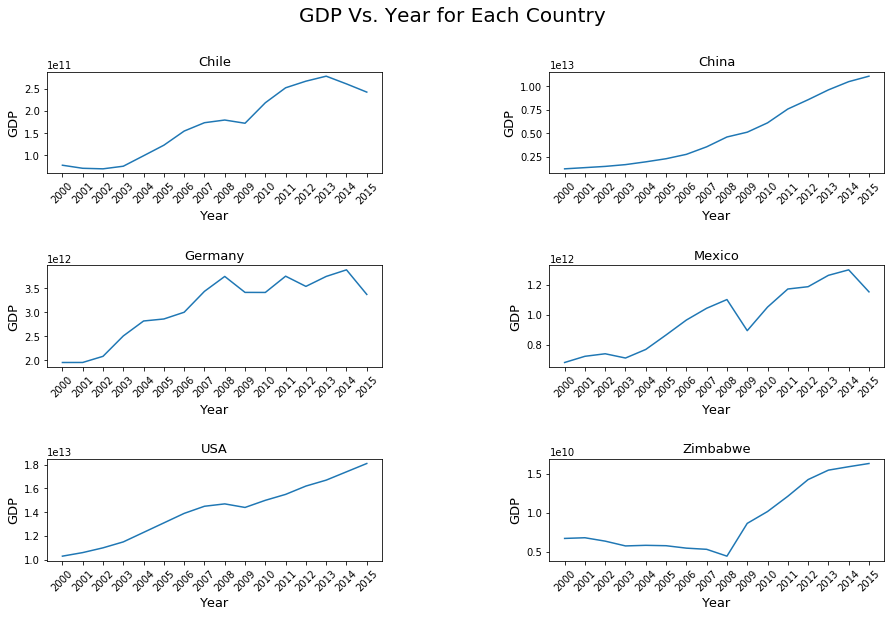

In [27]:
fig = plt.figure(figsize = (15, 9))
fig.suptitle('GDP Vs. Year for Each Country', fontsize = 20)
plt.subplots_adjust(wspace = 0.5, hspace = 0.9)
index = 1
countries = life_gdp.Country.unique()
for country in countries:
    plt.subplot(3, 2, index)
    data = life_gdp[life_gdp.Country == country]
    sns.lineplot(data = data, x = "Year", y = "GDP")
    plt.xticks(life_gdp.Year.unique(), rotation = 45)
    plt.xlabel("Year", fontsize = 13)
    plt.ylabel("GDP", fontsize = 13)
    plt.title(country, fontsize = 13)
    index += 1
plt.savefig("GDP Vs. Year line plot.png")

# Calculating average Life Expectancy and GDP for each country

In [13]:
#Calculating average life expectancy for each country
life_gdp.groupby("Country").Life_Expectancy.mean().reset_index()

,Country,Life_Expectancy
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,USA,78.06250
5,Zimbabwe,50.09375


In [14]:
#Calculating average gdp for each country
life_gdp.groupby("Country").GDP.mean().reset_index()

,Country,GDP
0,Chile,1.697888e+11
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,USA,1.407500e+13
5,Zimbabwe,9.062580e+09


# Visualizing the average Life Expectancy and GDP across years

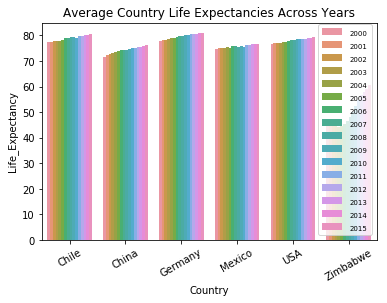

In [15]:
#Visualizing the average life expectancies for each country across years a bar plot
ax1 = sns.barplot(data = life_gdp, x = "Country", y = "Life_Expectancy", hue = "Year")
plt.title("Average Country Life Expectancies Across Years")
plt.xticks(rotation = 30)
plt.legend(loc = 4, bbox_to_anchor = (1.0, 0))
plt.setp(ax1.get_legend().get_texts(), fontsize='7')
plt.savefig("Average Life Expectancies Bar Plot.png")

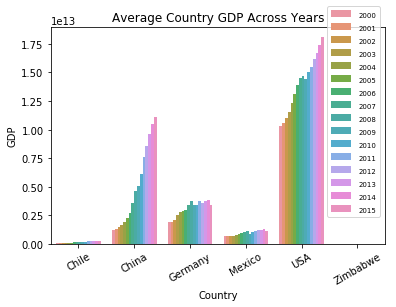

In [16]:
#Visualizing the average gdp for each country across years using a bar plot
ax = sns.barplot(data = life_gdp, x = "Country", y = "GDP", hue = "Year")
plt.title("Average Country GDP Across Years")
plt.xticks(rotation = 30)
plt.legend(loc = 4, bbox_to_anchor = (1.0, 0.1))
plt.setp(ax.get_legend().get_texts(), fontsize='7')
plt.savefig("Average GDP Bar Plot.png")

# Visualizing the relationship between Life Expectancy and GDP

<Figure size 432x288 with 0 Axes>

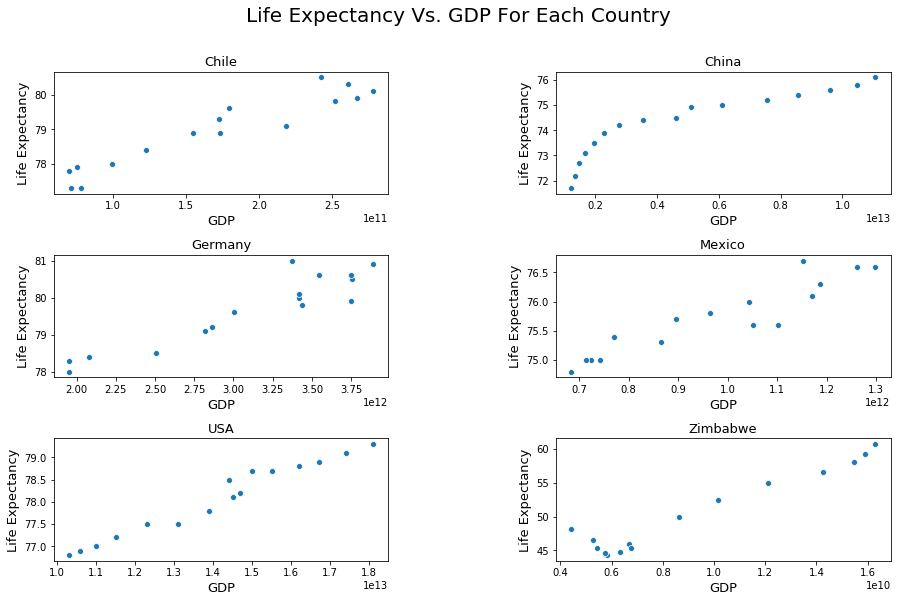

In [29]:
#Visualizing the relationship between life expectancy and GDP for each country to see if there is any correlation using a scatter plot
fig = plt.figure()
fig = plt.figure(figsize = (15, 9))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
fig.suptitle("Life Expectancy Vs. GDP For Each Country", fontsize = 20)
index = 1
countries = life_gdp.Country.unique()
for country in countries:
    plt.subplot(3, 2, index)
    sns.scatterplot(data = life_gdp[life_gdp.Country == country], x = "GDP", y = "Life_Expectancy")
    plt.xlabel("GDP", fontsize = 13)
    plt.ylabel("Life Expectancy", fontsize = 13)
    plt.title(country, fontsize = 13)
    index += 1
plt.savefig("Life Expectancy and GDP relationship.png")

# Calculating the Pearson correlation between Life Expectancy and GDP

In [18]:

for country in life_gdp.Country.unique():
    corr, p = pearsonr(life_gdp.Life_Expectancy[life_gdp.Country == country], life_gdp.GDP[life_gdp.Country == country])
    print([country, corr])

['Chile', 0.9498766659254413]
['China', 0.9085255408648356]
['Germany', 0.932698898256127]
['Mexico', 0.932237716784708]
['USA', 0.9817092382430257]
['Zimbabwe', 0.9661998955858779]


In [19]:
# Overall correlation for all six countries
life_gdp_corr, pval = pearsonr(life_gdp["Life_Expectancy"], life_gdp["GDP"])
life_gdp_corr

0.34320674844915605

In [20]:
# Conclusions
#The average life expectancies increases across the years for each country. This is the same for GDP.
#Zimbabwe recorded the lowest average life expectancies for all the specified years. 
#The other five countries had about the same average life expectancies across the years.
#Zimbabwe contributes the lowest GDP, followed by Chile, Mexico, Germany, China with USA contributing the highest GDP across the years.
#There is a positive correlation between life expectancy and GDP for each country. So Zimbabwe having a low GDP, also have a low life expectancy comparedd to the other countries.